<a href="https://colab.research.google.com/drive/1mTdK6FC9U2a0gc673VZKrAg26g0RfDj9" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/06_pytorch_transfer_learning.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/06_pytorch_transfer_learning.pdf)

# 06. PyTorch Transfer Learning



> **Note:** This notebook uses `torchvision`'s new [multi-weight support API (available in `torchvision` v0.13+)](https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/).

We've built a few models by hand so far.

But their performance has been poor.

You might be thinking, **is there a well-performing model that already exists for our problem?**

And in the world of deep learning, the answer is often *yes*.

We'll see how by using a powerful technique called [**transfer learning**](https://developers.google.com/machine-learning/glossary#transfer-learning).

## What is transfer learning?



**Transfer learning** allows us to take the patterns (also called weights) another model has learned from another problem and use them for our own problem.

For example, we can take the patterns a computer vision model has learned from datasets such as [ImageNet](https://www.image-net.org/) (millions of images of different objects) and use them to power our FoodVision Mini model.

Or we could take the patterns from a [language model](https://developers.google.com/machine-learning/glossary#masked-language-model) (a model that's been through large amounts of text to learn a representation of language) and use them as the basis of a model to classify different text samples.

The premise remains: find a well-performing existing model and apply it to your own problem.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-transfer-learning-example-overview.png" alt="transfer learning overview on different problems" width=900/>

*Example of transfer learning being applied to computer vision and natural language processing (NLP). In the case of computer vision, a computer vision model might learn patterns on millions of images in ImageNet and then use those patterns to infer on another problem. And for NLP, a language model may learn the structure of language by reading all of Wikipedia (and perhaps more) and then apply that knowledge to a different problem.*

## Why use transfer learning?

There are two main benefits to using transfer learning:

1. Can leverage an existing model (usually a neural network architecture) proven to work on problems similar to our own.
2. Can leverage a working model which has **already learned** patterns on similar data to our own. This often results in achieving **great results with less custom data**.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-transfer-learning-for-foodvision-mini%20.png" alt="transfer learning applied to FoodVision Mini" width=900/>

*We'll be putting these to the test for our FoodVision Mini problem, we'll take a computer vision model pretrained on ImageNet and try to leverage its underlying learned representations for classifying images of pizza, steak and sushi.*

Both research and practice support the use of transfer learning too.

A finding from a recent machine learning research paper recommended practitioners use transfer learning wherever possible.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-how-to-train-your-vit-section-6-transfer-learning-highlight.png" width=900 alt="how to train your vision transformer paper section 6, advising to use transfer learning if you can"/>

*A study into the effects of whether training from scratch or using transfer learning was better from a practitioner's point of view, found transfer learning to be far more beneficial in terms of cost and time. **Source:** [How to train your ViT? Data, Augmentation, and Regularization in Vision Transformers](https://arxiv.org/abs/2106.10270) paper section 6 (conclusion).*

And Jeremy Howard (founder of [fastai](https://www.fast.ai/)) is a big proponent of transfer learning.

> The things that really make a difference (transfer learning), if we can do better at transfer learning, it’s this world changing thing. Suddenly lots more people can do world-class work with less resources and less data. — [Jeremy Howard on the Lex Fridman Podcast](https://youtu.be/Bi7f1JSSlh8?t=72)




## Where to find pretrained models



The world of deep learning is an amazing place.

So amazing that many people around the world share their work.

Often, code and pretrained models for the latest state-of-the-art research is released within a few days of publishing.

And there are several places you can find pretrained models to use for your own problems.

| **Location** | **What's there?** | **Link(s)** |
| ----- | ----- | ----- |
| **PyTorch domain libraries** | Each of the PyTorch domain libraries (`torchvision`, `torchtext`) come with pretrained models of some form. The models there work right within PyTorch. | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [`torchtext.models`](https://pytorch.org/text/main/models.html), [`torchaudio.models`](https://pytorch.org/audio/stable/models.html), [`torchrec.models`](https://pytorch.org/torchrec/torchrec.models.html) |
| **HuggingFace Hub** | A series of pretrained models on many different domains (vision, text, audio and more) from organizations around the world. There's plenty of different datasets too. | https://huggingface.co/models, https://huggingface.co/datasets |
| **`timm` (PyTorch Image Models) library** | Almost all of the latest and greatest computer vision models in PyTorch code as well as plenty of other helpful computer vision features. | https://github.com/rwightman/pytorch-image-models|
| **Paperswithcode** | A collection of the latest state-of-the-art machine learning papers with code implementations attached. You can also find benchmarks here of model performance on different tasks. | https://paperswithcode.com/ |

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-transfer-learning-where-to-find-pretrained-models.png" alt="different locations to find pretrained neural network models" width=900/>

*With access to such high-quality resources as above, it should be common practice at the start of every deep learning problem you take on to ask, "Does a pretrained model exist for my problem?"*

> **Exercise:** Spend 5-minutes going through [`torchvision.models`](https://pytorch.org/vision/stable/models.html) as well as the [HuggingFace Hub Models page](https://huggingface.co/models), what do you find? (there's no right answers here, it's just to practice exploring)

## What we're going to cover



We're going to take a pretrained model from `torchvision.models` and customise it to work on (and hopefully improve) our FoodVision Mini problem.

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Getting setup** | We've written a fair bit of useful code over the past few sections, let's download it and make sure we can use it again. |
| **1. Get data** | Let's get the pizza, steak and sushi image classification dataset we've been using to try and improve our model's results. |
| **2. Create Datasets and DataLoaders** | We'll use the `data_setup.py` script we wrote in chapter 05. PyTorch Going Modular to setup our DataLoaders. |
| **3. Get and customise a pretrained model** | Here we'll download a pretrained model from `torchvision.models` and customise it to our own problem. |
| **4. Train model** | Let's see how the new pretrained model goes on our pizza, steak, sushi dataset. We'll use the training functions we created in the previous chapter. |
| **5. Evaluate the model by plotting loss curves** | How did our first transfer learning model go? Did it overfit or underfit?  |
| **6. Make predictions on images from the test set** | It's one thing to check out a model's evaluation metrics but it's another thing to view its predictions on test samples, let's *visualize, visualize, visualize*! |

## Where can you get help?



All of the materials for this course [are available on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions).

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch.

## 0. Getting setup



Let's get started by importing/downloading the required modules for this section.

To save us writing extra code, we're going to be leveraging some of the Python scripts (such as `data_setup.py` and `engine.py`) we created in the previous section, [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/).

Specifically, we're going to download the [`going_modular`](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular) directory from the `pytorch-deep-learning` repository (if we don't already have it).

We'll also get the [`torchinfo`](https://github.com/TylerYep/torchinfo) package if it's not available.

`torchinfo` will help later on to give us a visual representation of our model.

> **Note:** As of June 2022, this notebook uses the nightly versions of `torch` and `torchvision` as `torchvision` v0.13+ is required for using the updated multi-weights API. You can install these using the command below.

In [12]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
torch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


#### Install the required packages and download the `going_modular` directory


In [13]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

- **Git Clone**:  
  - `git clone` is a command used to copy a repository from a remote source (like GitHub) to your local machine.  
  - In this code, `!git clone https://github.com/mrdbourke/pytorch-deep-learning` downloads the entire `pytorch-deep-learning` repository from GitHub.  
  - The `!` at the beginning of the command allows it to be executed directly in a Jupyter notebook cell as a shell command.

- **MV (Move)**:  
  - The `mv` command is used to move or rename files and directories in Unix-like systems.  
  - In this code, `!mv pytorch-deep-learning/going_modular .` moves the `going_modular` directory from the downloaded `pytorch-deep-learning` folder to the current directory (`.`).  
  - This makes the `going_modular` scripts easily accessible for import in the notebook.

- **RM (Remove)**:  
  - The `rm` command is used to delete files or directories.  
  - The `-rf` flags are used to forcefully remove directories and their contents recursively.  
  - In this code, `!rm -rf pytorch-deep-learning` deletes the `pytorch-deep-learning` directory after the `going_modular` folder has been moved.  
  - This cleans up the workspace by removing unnecessary files downloaded during the `git clone` process.

- **Summary**:  
  - `git clone` downloads the repository.  
  - `mv` moves the required directory to the current location.  
  - `rm -rf` removes the downloaded repository to keep the workspace tidy.  
  - This sequence ensures the necessary scripts are available locally while maintaining a clean workspace.

#### Setup Device-agnostic code

In [14]:
  # Setup device-agnostic code
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # Defaults to CPU if NVIDIA GPU/Apple GPU aren't available


print(f"device: {device}")

device: cuda


## 1. Get data



Before we can start to use **transfer learning**, we'll need a dataset.

To see how transfer learning compares to our previous attempts at model building, we'll download the same dataset we've been using for FoodVision Mini.

Let's write some code to download the [`pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip) dataset from the course GitHub and then unzip it.

We can also make sure if we've already got the data, it doesn't redownload.

In [15]:
import os
import zipfile

from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

    # Remove .zip file
    os.remove(data_path / "pizza_steak_sushi.zip")

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


Excellent!

Now we've got the same dataset we've been using previously, a series of images of pizza, steak and sushi in standard image classification format.

Let's now create paths to our training and test directories.

In [16]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

## 2. Create Datasets and DataLoaders



Since we've downloaded the `going_modular` directory, we can use the [`data_setup.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/data_setup.py) script we created in section [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy) to prepare and setup our DataLoaders.

But since we'll be using a pretrained model from [`torchvision.models`](https://pytorch.org/vision/stable/models.html), there's a specific transform we need to prepare our images first.

### 2.1 Creating a transform for `torchvision.models` (manual creation)


#### Understanding Data Transforms for Pretrained Models in PyTorch



When using a pretrained model, it's important that **your custom data going into the model is prepared in the same way as the original training data that went into the model**. This ensures that the model can make accurate predictions, as it has been trained on data with specific characteristics.

Prior to `torchvision` v0.13+, to create a transform for a pretrained model in `torchvision.models`, the documentation stated:

> All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.
>
> The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`.
>
> You can use the following transform to normalize:
>
> ```
> normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
>                                  std=[0.229, 0.224, 0.225])
> ```

The good news is, we can achieve the above transformations with a combination of:

| **Transform number** | **Transform required** | **Code to perform transform** |
| ----- | ----- | ----- |
| 1 | Mini-batches of size `[batch_size, 3, height, width]` where height and width are at least 224x224^. | `torchvision.transforms.Resize()` to resize images into `[3, 224, 224]`^ and `torch.utils.data.DataLoader()` to create batches of images. |
| 2 | Values between 0 & 1. | `torchvision.transforms.ToTensor()` |
| 3 | A mean of `[0.485, 0.456, 0.406]` (values across each colour channel). | `torchvision.transforms.Normalize(mean=...)` to adjust the mean of our images.  |
| 4 | A standard deviation of `[0.229, 0.224, 0.225]` (values across each colour channel). | `torchvision.transforms.Normalize(std=...)` to adjust the standard deviation of our images.  |

> **Note:** some pretrained models from `torchvision.models` in different sizes to `[3, 224, 224]`, for example, some might take them in `[3, 240, 240]`. For specific input image sizes, see the documentation.

---

##### Why These Specific Numbers?

The mean and standard deviation values (`[0.485, 0.456, 0.406]` for mean and `[0.229, 0.224, 0.225]` for standard deviation) might seem arbitrary, but they are not. These values were calculated from the **ImageNet dataset**, which is a large dataset of over 14 million images across 1,000 classes. Remember that these numbers are specific to ImageNet. If you are working with a different dataset, the mean and standard deviation values will likely be different. Here's how they were derived:

1. **Mean Calculation**:
   - The mean values `[0.485, 0.456, 0.406]` represent the average pixel intensity across the red, green, and blue (RGB) channels of the ImageNet dataset.
   - These values were computed by taking the average pixel intensity for each channel across a large subset of the ImageNet dataset.

2. **Standard Deviation Calculation**:
   - The standard deviation values `[0.229, 0.224, 0.225]` represent the spread or variability of pixel intensities across the RGB channels.
   - These values were computed by calculating the standard deviation of pixel intensities for each channel across the same subset of the ImageNet dataset.

---

##### Why Do We Need to Normalize Data?

Normalizing the data (subtracting the mean and dividing by the standard deviation) has several benefits:

1. **Faster Convergence**:
   - Normalizing the data helps the neural network converge faster during training. This is because the optimization algorithm (e.g., gradient descent) can navigate the loss landscape more efficiently when the input data is centered around zero and has a consistent scale.

2. **Better Performance**:
   - Pretrained models are trained on normalized data, so feeding them normalized data ensures that the model performs as expected. If the input data is not normalized, the model's predictions may be inaccurate.

3. **Stability**:
   - Normalization helps stabilize the training process by preventing large variations in the input data, which can lead to numerical instability or exploding gradients.

---

##### Do We Always Need to Normalize?

While normalization is highly recommended, it is not strictly necessary. Neural networks are capable of learning the appropriate data distributions on their own. However, providing normalized data can significantly speed up training and improve model performance, especially when using pretrained models.

---

##### Customizing Transforms for Your Data

If you're working with a dataset other than ImageNet, you can calculate your own mean and standard deviation values. Here's how:

1. **Calculate Mean and Standard Deviation**:
   - Iterate through your dataset and compute the mean and standard deviation for each channel (RGB) across all images.
   - Use these values to create a custom normalization transform.

2. **Apply Custom Transforms**:
   - Replace the ImageNet mean and standard deviation values with your custom values in the `transforms.Normalize()` function.

For example:
```python
custom_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[your_mean_r, your_mean_g, your_mean_b],
                         std=[your_std_r, your_std_g, your_std_b])
])
```


In [17]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
import test

manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])



- **Transformation Pipeline**:
  - Normalizes your data based on the custom mean and standard deviation values provided.
  - Ensures the data can be fed into a pretrained model in the same way as ImageNet's data.

- **Purpose**:
  - Essential for ensuring the model performs as expected.
  - Particularly important when using transfer learning with pretrained models.

Wonderful!

Now we've got a **manually created series of transforms** ready to prepare our images, let's create training and testing DataLoaders.

We can create these using the `create_dataloaders` function from the [`data_setup.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/data_setup.py) script we created in [05. PyTorch Going Modular Part 2](https://www.learnpytorch.io/05_pytorch_going_modular/#2-create-datasets-and-dataloaders-data_setuppy).

We'll set `batch_size=32` so our model sees mini-batches of 32 samples at a time.

And we can transform our images using the transform pipeline we created above by setting `transform=manual_transforms`.

> **Note:** I've included this manual creation of transforms in this notebook because you may come across resources that use this style. It's also important to note that because these transforms are manually created, they're also infinitely customizable. So if you wanted to include data augmentation techniques in your transforms pipeline, you could.

In [18]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir, # data_setup.py
                                                                               test_dir=test_dir,
                                                                               transform=manual_transforms, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7b2e27e37c50>,
 ['pizza', 'steak', 'sushi'])

#### Syntax of Using `.py` Scripts  



- **Importing the Script**:  
  - Earlier in the notebook, the `data_setup` module was imported using the line:  
  ```python
  from going_modular import data_setup
  ```  
  - This means that `data_setup` is a Python script (`.py` file) located in the `going_modular` directory, and it contains functions that can be used in the notebook.  

- **Calling a Function from the Script**:  
  - The syntax `data_setup.create_dataloaders` is used to call the `create_dataloaders` function defined in the `data_setup.py` script. This is a common pattern in Python where you import a module and then access its functions using dot notation (`module.function_name`).  


#### Importance of Converting to DataLoader



- **What is a DataLoader?**:
  - A **DataLoader** in PyTorch is a utility that helps in loading and iterating over datasets in mini-batches. It provides features like shuffling, batching, and parallel data loading, making it easier to work with large datasets.

- **Why Convert to DataLoader?**:
  - **Efficient Data Handling**: DataLoaders allow you to load data in mini-batches, which is crucial for training deep learning models efficiently, especially when dealing with large datasets.
  - **Shuffling**: DataLoaders can shuffle the data, which helps in reducing overfitting and improving model generalization.
  - **Parallel Loading**: DataLoaders can load data in parallel using multiple workers, speeding up the data loading process.
  - **Batching**: DataLoaders automatically split the dataset into mini-batches, which is necessary for training models using gradient-based optimization methods.
  - **Integration with Models**: DataLoaders seamlessly integrate with PyTorch models, making it easy to feed data into the model during training and evaluation.

- **Example Use Case**:
  - In the provided code, `train_dataloader` and `test_dataloader` are created to handle the training and testing datasets, respectively. These DataLoaders will:
    - Apply the specified transformations (resizing, normalization, etc.).
    - Load data in batches of 32.
    - Shuffle the training data (if specified).
    - Enable efficient data loading during model training and evaluation.

### 2.2 Creating a transform for `torchvision.models` (auto creation)



As previously stated, when using a pretrained model, it's important that **your custom data going into the model is prepared in the same way as the original training data that went into the model**.

Above we saw how to manually create a transform for a pretrained model.

But as of `torchvision` v0.13+, an automatic transform creation feature has been added.

When you setup a model from `torchvision.models` and select the pretrained model weights you'd like to use, for example, say we'd like to use:
    
```python
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
```

Where,
* `EfficientNet_B0_Weights` is the model architecture weights we'd like to use (there are many different model architecture options in `torchvision.models`).
* `DEFAULT` means the *best available* weights (the best performance in ImageNet).
    * **Note:** Depending on the model architecture you choose, you may also see other options such as `IMAGENET_V1` and `IMAGENET_V2` where generally the higher version number the better. Though if you want the best available, `DEFAULT` is the easiest option. See the [`torchvision.models` documentation](https://pytorch.org/vision/main/models.html) for more.
    
Let's try it out.

In [19]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available

weights

EfficientNet_B0_Weights.IMAGENET1K_V1

#### EfficientNet_B0_Weights Explained




When using a pretrained model like EfficientNet_B0, the weights play a crucial role in determining the model's performance and behavior. Here's a breakdown of what `EfficientNet_B0_Weights` represents:

##### What is EfficientNet_B0_Weights?
- **EfficientNet_B0_Weights** refers to the set of learned parameters (weights) for the EfficientNet_B0 architecture. These weights are the result of training the model on a large dataset, typically ImageNet, which contains millions of labeled images across thousands of categories.
- By using pretrained weights, you leverage the knowledge the model has already gained from this extensive training, allowing you to achieve good performance even with limited data.

##### Understanding the `DEFAULT` Option
- **`DEFAULT`**: This option selects the best available weights for the model. In most cases, these are the weights that achieved the highest performance on the ImageNet dataset.
- **Other Options**: Depending on the model architecture, you might encounter additional weight versions like `IMAGENET_V1` or `IMAGENET_V2`. These represent different versions of the weights, with higher version numbers generally indicating improved performance or updated training methodologies.
  - **`IMAGENET_V1`**: The original weights from the initial release of the model.
  - **`IMAGENET_V2`**: Updated weights, often resulting from retraining the model with improved techniques or larger datasets.

##### Why Use Pretrained Weights?
- **Transfer Learning**: Pretrained weights allow you to apply transfer learning, where you fine-tune the model on your specific dataset. This is especially useful when you have limited data, as the model already has a strong foundation of learned features.
- **Efficiency**: Using pretrained weights saves time and computational resources compared to training a model from scratch.

##### What is the EfficientNet_B0 Architecture?
- **EfficientNet_B0** is part of the EfficientNet family of models, which are designed to achieve high accuracy while being computationally efficient. The architecture is based on a **compound scaling method** that uniformly scales the model's depth, width, and resolution to balance performance and resource usage.
- **Key Features**:
  - **Depth**: The number of layers in the network.
  - **Width**: The number of channels in each layer.
  - **Resolution**: The input image size.
- EfficientNet_B0 is the smallest and fastest model in the EfficientNet series, making it ideal for tasks where computational resources are limited.

##### Datasets Using EfficientNet_B0
- **ImageNet**: The most common dataset for pretraining EfficientNet_B0. It contains over 1 million labeled images across 1,000 categories.
- **Transfer Learning**: After pretraining on ImageNet, EfficientNet_B0 can be fine-tuned on smaller, domain-specific datasets (e.g., medical imaging, satellite imagery, or custom datasets) for tasks like classification, object detection, or segmentation.

For more details on available weights and model architectures, refer to the [torchvision.models documentation](https://pytorch.org/vision/main/models.html).

And now to access the transforms associated with our `weights`, we can use the `transforms()` method.

This is essentially saying "get the data transforms that were used to train the `EfficientNet_B0_Weights` on ImageNet".

In [20]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

Notice how `auto_transforms` is very similar to `manual_transforms`, the only difference is that `auto_transforms` came with the model architecture we chose, where as we had to create `manual_transforms` by hand.

The benefit of automatically creating a transform through `weights.transforms()` is that you ensure you're using the same data transformation as the pretrained model used when it was trained.

However, the tradeoff of using automatically created transforms is a lack of customization.

We can use `auto_transforms` to create DataLoaders with `create_dataloaders()` just as before.

In [21]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7b2e27e80d90>,
 ['pizza', 'steak', 'sushi'])

## 3. Getting a pretrained model



Alright, here comes the fun part!

Over the past few notebooks we've been building PyTorch neural networks from scratch.

And while that's a good skill to have, our models haven't been performing as well as we'd like.

That's where **transfer learning** comes in.

The whole idea of transfer learning is to **take an already well-performing model on a problem-space similar to yours and then customise it to your use case**.

Since we're working on a computer vision problem (image classification with FoodVision Mini), we can find pretrained classification models in [`torchvision.models`](https://pytorch.org/vision/stable/models.html#classification).

Exploring the documentation, you'll find plenty of common computer vision architecture backbones such as:

| **Architecuture backbone** | **Code** |
| ----- | ----- |
| [ResNet](https://arxiv.org/abs/1512.03385)'s | `torchvision.models.resnet18()`, `torchvision.models.resnet50()`... |
| [VGG](https://arxiv.org/abs/1409.1556) (similar to what we used for TinyVGG) | `torchvision.models.vgg16()` |
| [EfficientNet](https://arxiv.org/abs/1905.11946)'s | `torchvision.models.efficientnet_b0()`, `torchvision.models.efficientnet_b1()`... |
| [VisionTransformer](https://arxiv.org/abs/2010.11929) (ViT's)| `torchvision.models.vit_b_16()`, `torchvision.models.vit_b_32()`... |
| [ConvNeXt](https://arxiv.org/abs/2201.03545) | `torchvision.models.convnext_tiny()`,  `torchvision.models.convnext_small()`... |
| More available in `torchvision.models` | `torchvision.models...` |

#### Understanding Neural Network Architecture Backbones



Neural network architecture backbones refer to the core structure of a neural network that defines how it processes input data (e.g., images) and extracts features. These backbones are often pretrained on large datasets like ImageNet and can be reused for different tasks, such as image classification, object detection, or segmentation. Below, we’ll break down the common architectures mentioned in the notebook:

---

##### **1. ResNet (Residual Networks)**

- **Key Idea**: ResNet introduced the concept of **residual connections** (or skip connections), which allow the network to learn residual functions instead of direct mappings. This helps in training very deep networks without suffering from the vanishing gradient problem.
- **Why It’s Popular**: ResNets are widely used because they can be very deep (e.g., ResNet-50, ResNet-101) while still being trainable and performing well on image classification tasks.
- **Code Examples**:
  - `torchvision.models.resnet18()`: A smaller ResNet with 18 layers.
  - `torchvision.models.resnet50()`: A deeper ResNet with 50 layers.

---

##### **2. VGG (Visual Geometry Group)**

- **Key Idea**: VGG networks are known for their simplicity and uniform architecture. They consist of multiple convolutional layers followed by max-pooling layers, and they use small 3x3 filters throughout.
- **Why It’s Popular**: VGG is easy to understand and implement, and it was one of the top-performing models in the ImageNet competition when it was introduced.
- **Code Example**:
  - `torchvision.models.vgg16()`: A VGG network with 16 layers.

---

##### **3. EfficientNet**

- **Key Idea**: EfficientNet uses a **compound scaling method** to balance the depth, width, and resolution of the network. This allows it to achieve high accuracy with fewer parameters and computational resources.
- **Why It’s Popular**: EfficientNet is highly efficient (hence the name) and performs well on image classification tasks while being lightweight.
- **Code Examples**:
  - `torchvision.models.efficientnet_b0()`: The smallest version of EfficientNet.
  - `torchvision.models.efficientnet_b1()`: A slightly larger version.

---

##### **4. Vision Transformer (ViT)**

- **Key Idea**: Vision Transformers apply the **Transformer architecture** (originally designed for natural language processing) to image data. They split images into patches and process them using self-attention mechanisms.
- **Why It’s Popular**: ViTs have shown state-of-the-art performance on image classification tasks, especially when trained on large datasets.
- **Code Examples**:
  - `torchvision.models.vit_b_16()`: A Vision Transformer with a base configuration and 16x16 patch size.
  - `torchvision.models.vit_b_32()`: A Vision Transformer with a base configuration and 32x32 patch size.

---

##### **5. ConvNeXt**

- **Key Idea**: ConvNeXt is a modern convolutional neural network architecture that combines the best practices from CNNs and Transformers. It uses techniques like **layer normalization** and **GELU activation** to improve performance.
- **Why It’s Popular**: ConvNeXt achieves performance comparable to Vision Transformers while retaining the simplicity and efficiency of CNNs.
- **Code Examples**:
  - `torchvision.models.convnext_tiny()`: A smaller version of ConvNeXt.
  - `torchvision.models.convnext_small()`: A slightly larger version.

---

#### Why Use Pretrained Backbones?

- **Transfer Learning**: Pretrained backbones allow you to leverage knowledge learned from large datasets (like ImageNet) and apply it to your specific task with minimal training.
- **Efficiency**: Instead of training a model from scratch, you can fine-tune a pretrained backbone, saving time and computational resources.
- **Performance**: Pretrained models often achieve better performance on new tasks, especially when you have limited data.

---

#### How to Choose a Backbone?

- **Task Complexity**: For simpler tasks, smaller models like ResNet-18 or EfficientNet-B0 may suffice. For more complex tasks, deeper models like ResNet-50 or ConvNeXt might be better.
- **Resource Constraints**: If you have limited computational resources, consider lightweight models like EfficientNet or smaller versions of ConvNeXt.
- **Dataset Size**: If your dataset is small, using a pretrained backbone with transfer learning is highly recommended to avoid overfitting.

---

#### Summary

- **ResNet**: Great for deep networks with residual connections.
- **VGG**: Simple and uniform architecture, easy to implement.
- **EfficientNet**: Highly efficient and lightweight.
- **Vision Transformer (ViT)**: State-of-the-art performance using self-attention.
- **ConvNeXt**: Modern CNN architecture with Transformer-like performance.

By understanding these backbones, you can choose the right architecture for your specific task and leverage transfer learning effectively!

### 3.1 Which pretrained model should you use?



It depends on your problem/the device you're working with.

Generally, the higher number in the model name (e.g. `efficientnet_b0()` -> `efficientnet_b1()` -> `efficientnet_b7()`) means *better performance* but a *larger* model.

You might think better performance is *always better*, right?

That's true but **some better performing models are too big for some devices**.

For example, say you'd like to run your model on a mobile-device, you'll have to take into account the limited compute resources on the device, thus you'd be looking for a smaller model.

But if you've got unlimited compute power, as [*The Bitter Lesson*](http://www.incompleteideas.net/IncIdeas/BitterLesson.html) states, you'd likely take the biggest, most compute hungry model you can.

Understanding this **performance vs. speed vs. size** tradeoff will come with time and practice.

For me, I've found a nice balance in the `efficientnet_bX` models.

As of May 2022, [Nutrify](https://nutrify.app) (the machine learning powered app I'm working on) is powered by an `efficientnet_b0`.

[Comma.ai](https://comma.ai/) (a company that makes open source self-driving car software) [uses an `efficientnet_b2`](https://geohot.github.io/blog/jekyll/update/2021/10/29/an-architecture-for-life.html) to learn a representation of the road.

> **Note:** Even though we're using `efficientnet_bX`, it's important not to get too attached to any one architecture, as they are always changing as new research gets released. Best to experiment, experiment, experiment and see what works for your problem.

### 3.2 Setting up a pretrained model



The pretrained model we're going to be using is [`torchvision.models.efficientnet_b0()`](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_b0.html).

The architecture is from the paper *[EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)*.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-effnet-b0-feature-extractor.png" alt="efficienet_b0 from PyTorch torchvision feature extraction model" width=900/>

*Example of what we're going to create, a pretrained [`EfficientNet_B0` model](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html) from `torchvision.models` with the output layer adjusted for our use case of classifying pizza, steak and sushi images.*

We can setup the `EfficientNet_B0` pretrained ImageNet weights using the same code as we used to create the transforms.


```python
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights for ImageNet
```

This means the model has already been trained on millions of images and has a good base representation of image data.

The PyTorch version of this pretrained model is capable of achieving ~77.7% accuracy across ImageNet's 1000 classes.

We'll also send it to the target device.

In [22]:
# OLD: Setup the model with pretrained weights and send it to the target device (this was prior to torchvision v0.13)
# model = torchvision.models.efficientnet_b0(pretrained=True).to(device) # OLD method (with pretrained=True)

# NEW: Setup the model with pretrained weights and send it to the target device (torchvision v0.13+)
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

#model # uncomment to output (it's very long)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 59.5MB/s]


> **Note:** In previous versions of `torchvision`, you'd create a pretrained model with code like:
>
> `model = torchvision.models.efficientnet_b0(pretrained=True).to(device)`
>
> However, running this using `torchvision` v0.13+ will result in errors such as the following:
>
> `UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.`
>
> And...
>
> `UserWarning: Arguments other than a weight enum or None for weights are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing weights=EfficientNet_B0_Weights.IMAGENET1K_V1. You can also use weights=EfficientNet_B0_Weights.DEFAULT to get the most up-to-date weights.`



#### **Understanding the EfficientNet-B0 Model**



If we print the model, we get something similar to the following:

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-v2-effnetb0-model-print-out.png" alt="output of printing the efficientnet_b0 model from torchvision.models" width=900/>

Lots and lots and lots of layers.

This is one of the benefits of transfer learning: taking an existing model, crafted by some of the best engineers in the world, and applying it to your own problem. By using a pretrained model like EfficientNet-B0, you can leverage the knowledge it has already learned from a large dataset (e.g., ImageNet) and fine-tune it for your specific task, saving time and computational resources.

---

##### **1. `features`**
- The `features` block is a collection of **convolutional layers** and **activation layers** that learn a **base representation** of the input image data.
- These layers are often referred to as the **feature extractor** because they extract meaningful patterns (or **features**) from the input images, such as edges, textures, shapes, and more complex structures like objects or parts of objects.
- For example:
  - Early layers might detect simple features like edges or corners.
  - Deeper layers might detect more complex features like eyes, wheels, or entire objects.
- These features are learned during training on a large dataset (e.g., ImageNet) and are reused in transfer learning to save time and computational resources.

---

##### **2. `avgpool`**
- The `avgpool` (average pooling) layer takes the output of the `features` block and **summarizes** it into a **feature vector**.
- **What is a feature vector?**
  - A feature vector is a **compact numerical representation** of the input image, derived from the features extracted by the `features` block.
  - It is essentially a list of numbers (a vector) where each number represents a specific feature or pattern detected in the image.
  - For example, if the `features` block outputs a tensor of shape `(batch_size, 1280, 7, 7)` (where `1280` is the number of feature channels and `7x7` is the spatial size), the `avgpool` layer reduces this to a tensor of shape `(batch_size, 1280)` by averaging over the spatial dimensions (`7x7`). This `1280-dimensional vector` is the feature vector.
- The feature vector captures the **essence** of the image in a way that is useful for classification or other tasks.

---

##### **3. `classifier`**
- The `classifier` takes the **feature vector** and transforms it into a vector with the **same dimensionality as the number of output classes**.
- **What does "dimensionality" mean?**
  - Dimensionality refers to the **size** or **length** of the vector. For example, a 1000-dimensional vector has 1000 numbers.
  - In the case of `efficientnet_b0`, the classifier outputs a vector of size `1000` because the model was pretrained on ImageNet, which has 1000 classes.
  - Each number in this output vector represents the model's **confidence score** for a specific class. For example, if the model is classifying an image of a cat, the output vector might have high values for classes like "cat," "dog," or "tiger," and low values for unrelated classes like "car" or "tree."
- **Why does the output dimensionality match the number of classes?**
  - The output vector is used to determine the **predicted class** of the input image. For example:
    - If there are 10 classes, the output vector will have 10 numbers, one for each class.
    - The class with the highest score is chosen as the model's prediction.
  - In transfer learning, you often modify the classifier to match the number of classes in your specific task. For example, if your task has 5 classes, you would replace the final layer of the classifier to output a 5-dimensional vector.

---


### 3.3 Getting a summary of our model with `torchinfo.summary()`


#### **Using `torchinfo.summary()` to Analyze the Model**

To learn more about our model, let's use `torchinfo`'s [`summary()` method](https://github.com/TylerYep/torchinfo#documentation). This method provides a detailed summary of the model's architecture, including information about the layers, their output shapes, the number of parameters, and more. It's a powerful tool for understanding the structure and behavior of your model.

To use `torchinfo.summary()`, we'll pass in the following arguments:

- **`model`**: The model we'd like to get a summary of. In this case, it's our `efficientnet_b0` model.
- **`input_size`**: The shape of the data we'd like to pass to our model. For `efficientnet_b0`, the input size is `(batch_size, 3, 224, 224)`, where:
  - `batch_size` is the number of images processed at once.
  - `3` represents the number of color channels (RGB).
  - `224, 224` is the height and width of the input image.
  
  **Note:** Many modern models, including variants of EfficientNet, can handle input images of varying sizes thanks to [`torch.nn.AdaptiveAvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html). This layer adaptively adjusts the `output_size` of a given input as required. You can experiment with different input sizes by passing them to `summary()` or your models.

- **`col_names`**: The various information columns we'd like to see about our model. Common columns include:
  - `"input_size"`: The size of the input to each layer.
  - `"output_size"`: The size of the output from each layer.
  - `"num_params"`: The number of parameters in each layer.
  - `"trainable"`: Whether the layer is trainable or not.
  
- **`col_width`**: The width of the columns in the summary output. This controls how much space each column takes up in the printed summary.

- **`row_settings`**: What features to show in a row. This can include settings like `"depth"` (to show the depth of each layer in the model) or `"var_names"` (to show variable names).

---

#### **What Does `torchinfo.summary()` Do?**
- **Model Visualization**: It provides a clear, tabular representation of the model's architecture, making it easier to understand how data flows through the network.
- **Parameter Count**: It shows the number of parameters in each layer and the total number of parameters in the model. This is useful for understanding the model's complexity and memory requirements.
- **Output Shapes**: It displays the shape of the output at each layer, helping you verify that the model is processing data as expected.
- **Trainable Layers**: It indicates which layers are trainable and which are frozen (if any), which is particularly useful in transfer learning scenarios.



In [23]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-unfrozen-layers.png" alt="output of torchinfo.summary() when passed our model with all layers as trainable" width=900/>

Woah!

Now that's a big model!

From the output of the summary, we can see all of the various input and output shape changes as our image data goes through the model.

And there are a whole bunch more total parameters (pretrained weights) to recognize different patterns in our data.

For reference, our model from previous sections, **TinyVGG had 8,083 parameters vs. 5,288,548 parameters for `efficientnet_b0`, an increase of ~654x**!

What do you think, will this mean better performance?

### 3.4 Freezing the base model and changing the output layer to suit our needs


#### **Freezing Layers in Transfer Learning**

The process of transfer learning typically involves freezing some base layers of a pretrained model (usually the `features` section) and then adjusting the output layers (also called head/classifier layers) to suit your specific problem.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-v2-effnet-changing-the-classifier-head.png" alt="changing the efficientnet classifier head to a custom number of outputs" width=900/>

*You can customize the outputs of a pretrained model by changing the output layer(s) to match your problem. For example, the original `torchvision.models.efficientnet_b0()` comes with `out_features=1000` because it was trained on ImageNet, which has 1000 classes. However, for a problem like classifying images of pizza, steak, and sushi, you only need `out_features=3`.*

---

##### **Why Freeze Layers?**

Freezing layers is a critical step in transfer learning. Here's why:

##### **1. Preserve Pretrained Knowledge**
- Pretrained models like `efficientnet_b0` have already learned useful features (e.g., edges, textures, shapes) from large datasets like ImageNet.
- By freezing the `features` section, you **retain this knowledge** and avoid overwriting it during training.
- This is especially useful when your dataset is small, as it prevents the model from "forgetting" the valuable patterns it learned from the larger dataset.

##### **2. Reduce Training Time and Computational Cost**
- Freezing layers means fewer parameters are updated during training.
- This **speeds up training** and reduces the computational resources required, as gradients are not calculated for frozen layers.

##### **3. Prevent Overfitting**
- If you train all layers from scratch on a small dataset, the model may overfit (memorize the training data instead of generalizing).
- Freezing the base layers helps the model **generalize better** by leveraging the pretrained features, which are already well-suited for image recognition tasks.

---
> **Note:** In other words, *freeze* layers means to keep them how they are during training. For example, if your model has pretrained layers, to *freeze* them would be to say, "don't change any of the patterns in these layers during training, keep them how they are." In essence, we'd like to keep the pretrained weights/patterns our model has learned from ImageNet as a backbone and then only change the output layers.

##### **How to Freeze Layers**
- To freeze layers, set the attribute `requires_grad=False` for the parameters in the `features` section.
- For parameters with `requires_grad=False`, PyTorch does not track gradient updates, meaning these parameters **remain unchanged** during training.
- In essence, a parameter with `requires_grad=False` is "untrainable" or "frozen" in place.


In [24]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.features.parameters():
    param.requires_grad = False

Let's break down what's happening in this code snippet:


1. **`model.features.parameters()`**:
   - `model.features` refers to the part of the model that contains the convolutional layers (or feature extractor) in a model like `efficientnet_b0`.
   - `.parameters()` is a method that returns an iterator over all the parameters (weights and biases) of the layers in the `features` section.

2. **`for param in model.features.parameters()`**:
   - This is a loop that iterates over every parameter (weight or bias) in the `features` section of the model.
   - `param` is a variable that represents each individual parameter during the iteration.

3. **`param.requires_grad = False`**:
   - `requires_grad` is a PyTorch attribute that determines whether gradients should be computed for this parameter during backpropagation.
   - By setting `requires_grad = False`, you are telling PyTorch **not to compute gradients** for this parameter during training.
   - This effectively "freezes" the parameter, meaning its value will **not be updated** by the optimizer during training.



Feature extractor layers frozen!

Let's now adjust the output layer or the `classifier` portion of our pretrained model to our needs.

Right now our pretrained model has `out_features=1000` because there are 1000 classes in ImageNet.

However, we don't have 1000 classes, we only have three, pizza, steak and sushi.

We can change the `classifier` portion of our model by creating a new series of layers.

The current `classifier` consists of:

```
(classifier): Sequential(
    (0): Dropout(p=0.2, inplace=True)
    (1): Linear(in_features=1280, out_features=1000, bias=True)
```

We'll keep the `Dropout` layer the same using [`torch.nn.Dropout(p=0.2, inplace=True)`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html).

> **Note:** [Dropout layers](https://developers.google.com/machine-learning/glossary#dropout_regularization) randomly remove connections between two neural network layers with a probability of `p`. For example, if `p=0.2`, 20% of connections between neural network layers will be removed at random each pass. This practice is meant to help regularize (prevent overfitting) a model by making sure the connections that remain learn features to compensate for the removal of the other connections (hopefully these remaining features are *more general*).

And we'll keep `in_features=1280` for our `Linear` output layer but we'll change the `out_features` value to the length of our `class_names` (`len(['pizza', 'steak', 'sushi']) = 3`).

Our new `classifier` layer should be on the same device as our `model`.

### Classifier Layer

In [25]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

#### **What is the Classifier Layer?**

In a neural network, particularly in models designed for classification tasks (like image classification), the **classifier layer** is the final part of the model that takes the extracted features (from the feature extractor) and maps them to the output classes. It is responsible for making the final predictions.



---

##### **Where is the Classifier Layer Originally From?**

In pretrained models like `efficientnet_b0` (from `torchvision.models`), the classifier layer is part of the original model architecture. For example, in `efficientnet_b0`, the classifier is typically a sequence of layers at the end of the model, such as:

```python
(classifier): Sequential(
    (0): Dropout(p=0.2, inplace=True)
    (1): Linear(in_features=1280, out_features=1000, bias=True)
)
```

- **`Dropout` Layer**: Randomly drops 20% of neuron outputs during training to prevent overfitting.
- **`Linear` Layer**: Maps the features (of size `1280`) to the output classes (originally `1000` for ImageNet).

---

##### **Why Recreate the Classifier Layer?**

When using a pretrained model for a new task (e.g., classifying pizza, steak, and sushi instead of 1000 ImageNet classes), the original classifier layer is no longer suitable because:
- The `out_features` of the `Linear` layer is set to `1000` (for ImageNet), but your task may require fewer (or more) output classes.
- You need to adjust the classifier to match the number of classes in your dataset.

---

##### **What Does "Recreate the Classifier Layer" Mean?**

Recreating the classifier layer involves **replacing the original classifier** with a new one that is tailored to your specific task. For example:

```python
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280, out_features=3, bias=True)
).to(device)
```

- The **`Dropout` layer** is kept the same (`p=0.2`) to maintain regularization.
- The **`Linear` layer** is updated to have `out_features=3` (for 3 classes: pizza, steak, sushi).
- The new classifier is moved to the appropriate device (e.g., GPU) using `.to(device)`.

---

##### **Why Only Modify the Classifier Layer?**
- The feature extractor layers are already well-trained on a large dataset and can generalize well to new tasks. Freezing them preserves their learned features.
- The classifier layer, however, is task-specific. Since your task has a different number of classes, you need to adjust the classifier to produce the correct number of outputs.

---

##### **What Happens During Training?**
- Only the weights of the **new classifier layer** are updated during training.
- The frozen layers (feature extractor) remain unchanged, but their outputs (extracted features) are used as input to the new classifier.

---

##### **Summary**
- By freezing the earlier layers, you preserve the pretrained feature extractor, which is already good at extracting general features.
- You only need to modify the classifier layer to account for the smaller custom dataset (e.g., changing `out_features` to match the number of classes).
- This approach is efficient and effective for transfer learning, especially when working with small datasets.




#### Model after changing the classifier layer

In [26]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/06-torchinfo-summary-frozen-layers.png" alt="output of torchinfo.summary() after freezing multiple layers in our model and changing the classifier head" width=900/>

Ho, ho! There's a fair few changes here!

Let's go through them:
* **Trainable column** - You'll see that many of the base layers (the ones in the `features` portion) have their Trainable value as `False`. This is because we set their attribute `requires_grad=False`. Unless we change this, these layers won't be updated during future training.
* **Output shape of `classifier`** - The `classifier` portion of the model now has an Output Shape value of `[32, 3]` instead of `[32, 1000]`. It's Trainable value is also `True`. This means its parameters will be updated during training. In essence, we're using the `features` portion to feed our `classifier` portion a base representation of an image and then our `classifier` layer is going to learn how to base representation aligns with our problem.
* **Less trainable parameters** - Previously there were 5,288,548 trainable parameters. But since we froze many of the layers of the model and only left the `classifier` as trainable, there's now only 3,843 trainable parameters (even less than our TinyVGG model). Though there's also 4,007,548 non-trainable parameters, these will create a base representation of our input images to feed into our `classifier` layer.

> **Note:** The more trainable parameters a model has, the more compute power/longer it takes to train. Freezing the base layers of our model and leaving it with less trainable parameters means our model should train quite quickly. This is one huge benefit of transfer learning, taking the already learned parameters of a model trained on a problem similar to yours and only tweaking the outputs slightly to suit your problem.

## 4. Train model



Now we've got a pretrained model that's semi-frozen and has a customised `classifier`, how about we see transfer learning in action?

To begin training, let's create a loss function and an optimizer.

Because we're still working with multi-class classification, we'll use `nn.CrossEntropyLoss()` for the loss function.

And we'll stick with `torch.optim.Adam()` as our optimizer with `lr=0.001`.


In [27]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Wonderful!

To train our model, we can use `train()` function we defined in the [05. PyTorch Going Modular section 04](https://www.learnpytorch.io/05_pytorch_going_modular/#4-creating-train_step-and-test_step-functions-and-train-to-combine-them).

The `train()` function is in the [`engine.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/going_modular/going_modular/engine.py) script inside the [`going_modular` directory](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/going_modular/going_modular).

Let's see how long it takes to train our model for 5 epochs.

> **Note:** We're only going to be training the parameters `classifier` here as all of the other parameters in our model have been frozen.

In [28]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Move model to the target device. engine.py will still work as expected.
model = model.to(device)

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0924 | train_acc: 0.3984 | test_loss: 0.9133 | test_acc: 0.5398
Epoch: 2 | train_loss: 0.8717 | train_acc: 0.7773 | test_loss: 0.7912 | test_acc: 0.8153
Epoch: 3 | train_loss: 0.7648 | train_acc: 0.7930 | test_loss: 0.7463 | test_acc: 0.8561
Epoch: 4 | train_loss: 0.7109 | train_acc: 0.7539 | test_loss: 0.6373 | test_acc: 0.8655
Epoch: 5 | train_loss: 0.6255 | train_acc: 0.7852 | test_loss: 0.6261 | test_acc: 0.8561
[INFO] Total training time: 18.503 seconds


With an `efficientnet_b0` backbone, our model achieves almost 85%+ accuracy on the test dataset, almost *double* what we were able to achieve with TinyVGG.

Not bad for a model we downloaded with a few lines of code.

## 5. Evaluate model by plotting loss curves



Our model looks like it's performing pretty well.

Let's plot it's loss curves to see what the training looks like over time.

We can plot the loss curves using the function `plot_loss_curves()` we created in [04. PyTorch Custom Datasets section 7.8](https://www.learnpytorch.io/04_pytorch_custom_datasets/#78-plot-the-loss-curves-of-model-0).

The function is stored in the [`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) script so we'll try to import it and download the script if we don't have it.

[INFO] Couldn't find helper_functions.py, downloading...


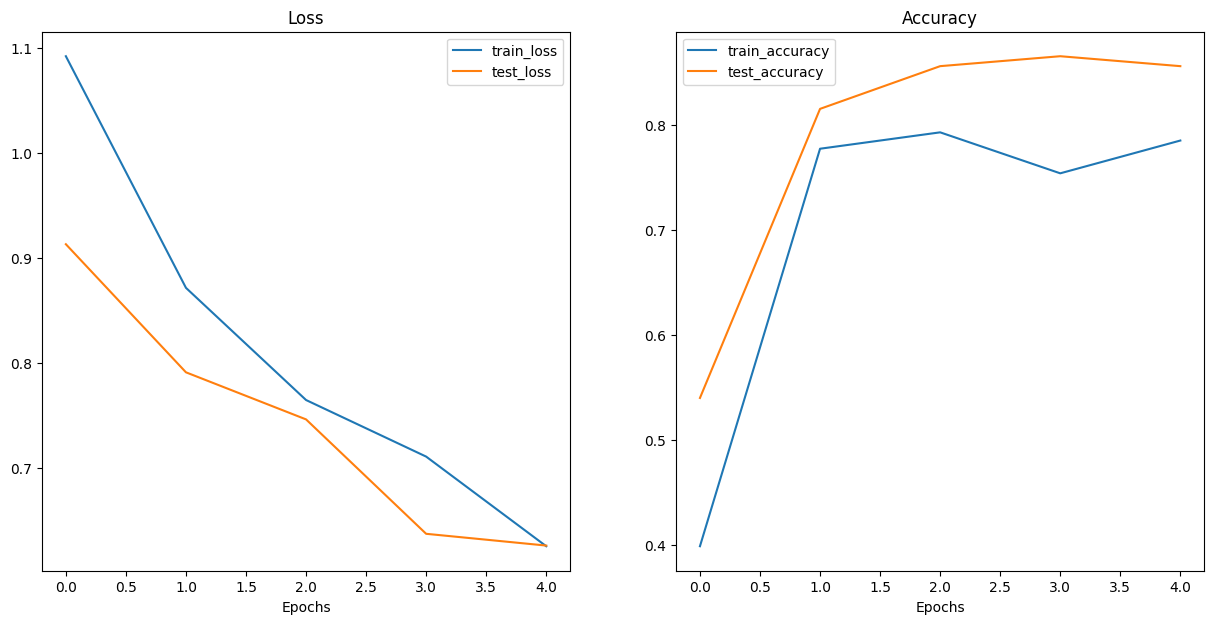

In [29]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

Those are some excellent looking loss curves!

It looks like the loss for both datasets (train and test) is heading in the right direction.

The same with the accuracy values, trending upwards.

That goes to show the power of **transfer learning**. Using a pretrained model often leads to pretty good results with a small amount of data in less time.

I wonder what would happen if you tried to train the model for longer? Or if we added more data?

> **Question:** Looking at the loss curves, does our model look like it's overfitting or underfitting? Or perhaps neither? Hint: Check out notebook [04. PyTorch Custom Datasets part 8. What should an ideal loss curve look like?](https://www.learnpytorch.io/04_pytorch_custom_datasets/#8-what-should-an-ideal-loss-curve-look-like) for ideas.

## 6. Make predictions on images from the test set



It looks like our model performs well quantitatively but how about qualitatively?

Let's find out by making some predictions with our model on images from the test set (these aren't seen during training) and plotting them.

*Visualize, visualize, visualize!*

One thing we'll have to remember is that for our model to make predictions on an image, the image has to be in *same* format as the images our model was trained on.

This means we'll need to make sure our images have:
* **Same shape** - If our images are different shapes to what our model was trained on, we'll get shape errors.
* **Same datatype** - If our images are a different datatype (e.g. `torch.int8` vs. `torch.float32`) we'll get datatype errors.
* **Same device** - If our images are on a different device to our model, we'll get device errors.
* **Same transformations** - If our model is trained on images that have been transformed in certain way (e.g. normalized with a specific mean and standard deviation) and we try and make predictions on images transformed in a different way, these predictions may be off.

> **Note:** These requirements go for all kinds of data if you're trying to make predictions with a trained model. Data you'd like to predict on should be in the same format as your model was trained on.

To do all of this, we'll create a function `pred_and_plot_image()` to:

1. Take in a trained model, a list of class names, a filepath to a target image, an image size, a transform and a target device.
2. Open an image with [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open).
3. Create a transform for the image (this will default to the `manual_transforms` we created above or it could use a transform generated from `weights.transforms()`).
4. Make sure the model is on the target device.
5. Turn on model eval mode with `model.eval()` (this turns off layers like `nn.Dropout()`, so they aren't used for inference) and the inference mode context manager.
6. Transform the target image with the transform made in step 3 and add an extra batch dimension with `torch.unsqueeze(dim=0)` so our input image has shape `[batch_size, color_channels, height, width]`.
7. Make a prediction on the image by passing it to the model ensuring it's on the target device.
8. Convert the model's output logits to prediction probabilities with `torch.softmax()`.
9. Convert model's prediction probabilities to prediction labels with `torch.argmax()`.
10. Plot the image with `matplotlib` and set the title to the prediction label from step 9 and prediction probability from step 8.

> **Note:** This is a similar function to [04. PyTorch Custom Datasets section 11.3's](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function) `pred_and_plot_image()` with a few tweaked steps.

In [30]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

What a good looking function!

Let's test it out by making predictions on a few random images from the test set.

We can get a list of all the test image paths using `list(Path(test_dir).glob("*/*.jpg"))`, the stars in the `glob()` method say "any file matching this pattern", in other words, any file ending in `.jpg` (all of our images).

And then we can randomly sample a number of these using Python's [`random.sample(population, k)`](https://docs.python.org/3/library/random.html#random.sample) where `population` is the sequence to sample and `k` is the number of samples to retrieve.

In this code, `PIL` (Python Imaging Library, now maintained under the name `Pillow`) is used to handle image processing tasks. Specifically, the `PIL.Image` module is imported to work with image files. Here's what `PIL` does in this code:

1. **Opening the Image**:
   ```python
   img = Image.open(image_path)
   ```
   The `Image.open()` function from the `PIL` library is used to open the image file located at the path specified by `image_path`. This function returns an `Image` object, which can be manipulated or processed further.

2. **Image Transformation**:
   After opening the image, the code applies a series of transformations to the image using `torchvision.transforms`. These transformations are necessary to prepare the image for input into the PyTorch model. The transformations include resizing the image, converting it to a tensor, and normalizing the pixel values.

   The `PIL.Image` object (`img`) is passed to the transformation pipeline, which converts it into a format suitable for the model.


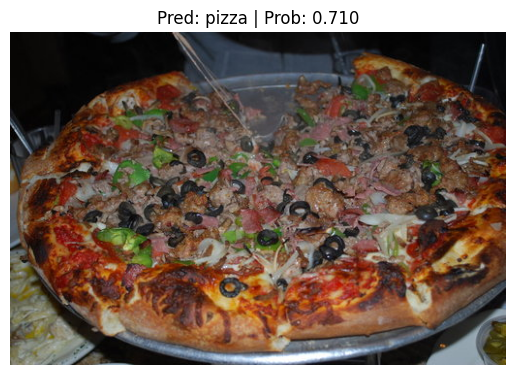

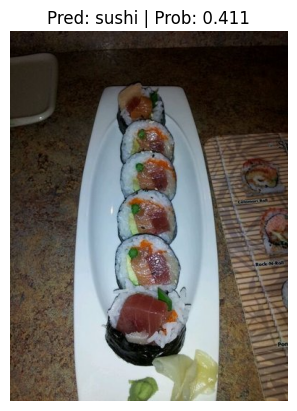

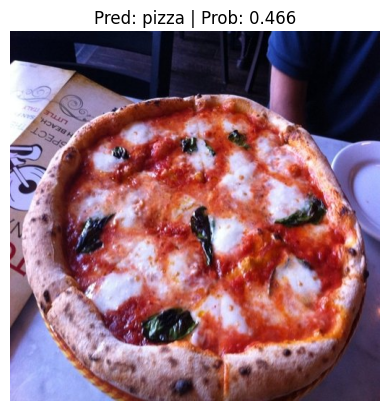

In [31]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))



1. **Selecting Random Images from the Test Set**:
   ```python
   num_images_to_plot = 3
   test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
   test_image_path_sample = random.sample(population=test_image_path_list, k=num_images_to_plot)
   ```
   - **`num_images_to_plot = 3`**: Specifies the number of random images to select from the test set.
   - **`test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))`**:
     - `Path(test_dir)` creates a `Path` object pointing to the directory containing the test images.
     - `.glob("*/*.jpg")` searches for all `.jpg` files in all subdirectories of `test_dir`.
     - `list(...)` converts the generator returned by `.glob()` into a list of file paths.
   - **`test_image_path_sample = random.sample(population=test_image_path_list, k=num_images_to_plot)`**:
     - `random.sample()` randomly selects `k` (in this case, 3) image paths from the list of all test image paths (`test_image_path_list`).

2. **Making Predictions and Plotting the Selected Images**:
   ```python
   for image_path in test_image_path_sample:
       pred_and_plot_image(model=model,
                           image_path=image_path,
                           class_names=class_names,
                           image_size=(224, 224))
   ```
   - **`for image_path in test_image_path_sample`**: Iterates over the randomly selected image paths.
   - **`pred_and_plot_image(...)`**: Calls the `pred_and_plot_image` function for each image path. This function:
     - Loads the image using `PIL`.
     - Applies the necessary transformations to prepare the image for the model.
     - Passes the image through the trained model to make a prediction.
     - Plots the image along with the predicted class label and the associated probability.

- Summary:
    - The code randomly selects a specified number of images (`num_images_to_plot`) from the test set.
    - For each selected image, it uses the `pred_and_plot_image` function to:
        - Make a prediction using the trained model.
        - Display the image along with the predicted class and confidence score.


### 6.1 Making predictions on a custom image



It looks like our model does well qualitatively on data from the test set.

But how about on our own custom image?

That's where the real fun of machine learning is!

Predicting on your own custom data, outside of any training or test set.

To test our model on a custom image, let's import the old faithful `pizza-dad.jpeg` image (an image of my dad eating pizza).

We'll then pass it to the `pred_and_plot_image()` function we created above and see what happens.

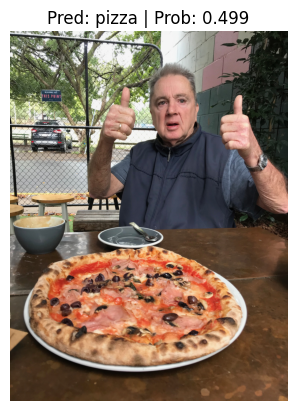

In [32]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names)

Two thumbs up!

Looks like our model got it right again!

But this time the prediction probability is higher than the one from TinyVGG (`0.373`) in [04. PyTorch Custom Datasets section 11.3](https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function).

This indicates our `efficientnet_b0` model is *more* confident in its prediction where as our TinyVGG model was par with just guessing.

## Main takeaways
* **Transfer learning** often allows you to get good results with a relatively small amount of custom data.
* Knowing the power of transfer learning, it's a good idea to ask at the start of every problem, "does an existing well-performing model exist for my problem?"
* When using a pretrained model, it's important that your custom data be formatted/preprocessed in the same way that the original model was trained on, otherwise you may get degraded performance.
* The same goes for predicting on custom data, ensure your custom data is in the same format as the data your model was trained on.
* There are [several different places to find pretrained models](https://www.learnpytorch.io/06_pytorch_transfer_learning/#where-to-find-pretrained-models) from the PyTorch domain libraries, HuggingFace Hub and libraries such as `timm` (PyTorch Image Models).

## Exercises

All of the exercises are focused on practicing the code above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 06](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/06_pytorch_transfer_learning_exercises.ipynb)
* [Example solutions notebook for 06](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/06_pytorch_transfer_learning_exercise_solutions.ipynb) (try the exercises *before* looking at this)
    * See a live [video walkthrough of the solutions on YouTube](https://youtu.be/ueLolShyFqs) (errors and all)

1. Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels. Check out [03. PyTorch Computer Vision section 10](https://www.learnpytorch.io/03_pytorch_computer_vision/#10-making-a-confusion-matrix-for-further-prediction-evaluation) for ideas.
2. Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images. You can do this by:
    * Predicting across all of the test dataset, storing the labels and predicted probabilities.
    * Sort the predictions by *wrong prediction* and then *descending predicted probabilities*, this will give you the wrong predictions with the *highest* prediction probabilities, in other words, the "most wrong".
    * Plot the top 5 "most wrong" images, why do you think the model got these wrong?
3. Predict on your own image of pizza/steak/sushi - how does the model go? What happens if you predict on an image that isn't pizza/steak/sushi?
4. Train the model from section 4 above for longer (10 epochs should do), what happens to the performance?
5. Train the model from section 4 above with more data, say 20% of the images from Food101 of Pizza, Steak and Sushi images.
    * You can find the [20% Pizza, Steak, Sushi dataset](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) on the course GitHub. It was created with the notebook [`extras/04_custom_data_creation.ipynb`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb).
6. Try a different model from [`torchvision.models`](https://pytorch.org/vision/stable/models.html) on the Pizza, Steak, Sushi data, how does this model perform?
    * You'll have to change the size of the classifier layer to suit our problem.
    * You may want to try an EfficientNet with a higher number than our B0, perhaps `torchvision.models.efficientnet_b2()`?
  
## Extra-curriculum
* Look up what "model fine-tuning" is and spend 30-minutes researching different methods to perform it with PyTorch. How would we change our code to fine-tune? Tip: fine-tuning usually works best if you have *lots* of custom data, where as, feature extraction is typically better if you have less custom data.
* Check out the new/upcoming [PyTorch multi-weights API](https://pytorch.org/blog/introducing-torchvision-new-multi-weight-support-api/) (still in beta at time of writing, May 2022), it's a new way to perform transfer learning in PyTorch. What changes to our code would need to be made to use the new API?
* Try to create your own classifier on two classes of images, for example, you could collect 10 photos of your dog and your friend's dog and train a model to classify the two dogs. This would be a good way to practice creating a dataset as well as building a model on that dataset.